# Machine Learning Project (ML-2025): Heart Disease Risk Prediction

Data & AI ( DIA 4 )

Author : Nassim LOUDIYI, Paul-Adrien LU-YEN-TUNG

Objective: Predict the presence of heart disease using classification models and SHAP interpretability.

## 0. Introduction

This project aims to build a supervised machine learning model capable of predicting the presence of heart disease based on structured clinical features (age, blood pressure, cholesterol, ECG results, chest pain type, etc.).

The goal is to follow the complete ML pipeline taught in the Data & AI major:
- data exploration and quality checks  
- preprocessing (encoding, scaling, pipelines)  
- baseline models  
- standard and advanced algorithms (RF, XGBoost, CatBoost, etc.)  
- hyperparameter tuning  
- ensemble learning  
- model evaluation and comparison  
- explainability using SHAP  

The final objective is to identify the most accurate and reliable model while ensuring interpretability, which is essential for medical decision-support applications.

## 0.1 Dataset Description

### 0.1.1 Target Variable

The target represents the presence of diagnosed heart disease:

| Value | Meaning |
|-------|---------|
| `0` | No heart disease |
| `1` | Presence of heart disease |

This formulation makes the problem a **binary supervised classification task**.

---

### 0.1.2 Feature Dictionary

The dataset contains 13 clinical features commonly used in cardiology for assessing heart disease risk.
They include demographic information (age, sex), physiological measurements (blood pressure, cholesterol),
electrocardiogram results, and exercise-related symptoms. These indicators are routinely used by clinicians
because they reflect key cardiovascular mechanisms, making them relevant predictors for machine learning models.

The table below summarizes the 13 input features, their medical meaning, and their data types.

| Feature | Description | Type |
|---------|-------------|------|
| **`age`** | Patient age in years | Continuous |
| **`gender`** | Sex (1 = Male, 0 = Female) | Binary categorical |
| **`chestpain`** | Chest pain type: 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic | Multi-class categorical |
| **`restingBP`** | Resting blood pressure (mm Hg) | Continuous |
| **`serumcholestrol`** | Serum cholesterol concentration (mg/dl) | Continuous |
| **`fastingbloodsugar`** | Fasting blood sugar > 120 mg/dl (1 = True, 0 = False) | Binary |
| **`restingelectro`** | Resting electrocardiogram results: 0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy | Multi-class categorical |
| **`maxheartrate`** | Maximum heart rate achieved during exercise | Continuous |
| **`exerciseangia`** | Exercise-induced angina (1 = Yes, 0 = No) | Binary |
| **`oldpeak`** | ST depression induced by exercise relative to rest | Continuous |
| **`slope`** | Slope of the ST segment: 1 = upsloping, 2 = flat, 3 = downsloping | Multi-class categorical |
| **`noofmajorvessels`** | Number of major blood vessels (0–3) visualized using fluoroscopy | Discrete categorical |
| **`target`** | Diagnosis result (0 = No heart disease, 1 = Heart disease) | Target |


## **Step 1 — Data Exploration, Data Quality Checks, Preprocessing & Baseline**

This first step provides a global understanding of the dataset, verifies data quality, prepares features for modeling, and establishes baseline performance for comparison.

---

### **1. Data Quality & Exploration**

We begin by assessing the structure and reliability of the dataset through several exploratory checks:

- Dataset structure and feature definitions  
- Statistical summary of numerical and categorical variables  
- Missing value inspection (none detected)  
- Duplicate detection  
- Outlier inspection using boxplots  
- Class imbalance analysis  
- Correlation matrix and heatmap  
- Exploratory visualizations (histograms, countplots, boxplots)

These steps ensure the dataset is clean, consistent, and suitable for supervised learning.

---

### **2. Preprocessing Pipeline**

A robust preprocessing pipeline is implemented to standardize feature preparation before model training:

- **OneHotEncoding** for categorical variables  
- **Standard Scaling** for numerical variables  
- Explicit separation of feature types  
- **Stratified train–test split** to preserve class distribution  
- End-to-end preprocessing using **ColumnTransformer + Pipeline**  

A **2D PCA visualization** is then performed on the fully transformed dataset.  
This PCA step is **strictly exploratory**: it helps assess dataset structure, variance distribution, and class separability.  
It **does not modify the training pipeline** and is *not used by any model*.

---

### **3. Baseline Models**

To establish minimum reference performance, two baseline models are trained:

- **DummyClassifier** (majority-class baseline)  
- **Logistic Regression** (simple and interpretable linear model)

Evaluation metrics: **Accuracy, Precision, Recall, F1-score, ROC-AUC**.

These baselines serve as performance thresholds that all advanced models must surpass.


### 1.1. Data Loading & Initial Inspection

We load the dataset and examine its initial structure to gain a first understanding of the data before conducting more detailed quality checks.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

sns.set(style="whitegrid")

df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe().T)

Shape: 1000 rows × 14 columns


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


The dataset contains 1,000 observations and 14 columns, all fully populated with no missing values. The first rows and descriptive statistics confirm that the clinical feature ranges are realistic and consistent, allowing us to proceed with more detailed data quality checks.

### 1.2. Data Quality Checks

We check the dataset for missing values and duplicated rows to ensure that no data cleaning is required before proceeding to further exploratory analysis.

In [2]:
print("\n=== Missing Values ===")
print(df.isna().sum())
print(f"Total missing values: {df.isna().sum().sum()}")

print("\n=== Duplicate Rows ===")
print(f"Total duplicated rows: {df.duplicated().sum()}")


=== Missing Values ===
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
Total missing values: 0

=== Duplicate Rows ===
Total duplicated rows: 0


All features contain zero missing values, and no duplicated rows are found in the dataset. This confirms that the data is complete and consistent, allowing us to safely continue with deeper analyses.

### 1.3. Target Distribution (Class Imbalance)

We analyze the distribution of the target variable to check for potential class imbalance, which may influence model performance and dictate which evaluation metrics are most appropriate.


=== Target Distribution ===


,Count,Percent
target,,
0,420,42.0
1,580,58.0


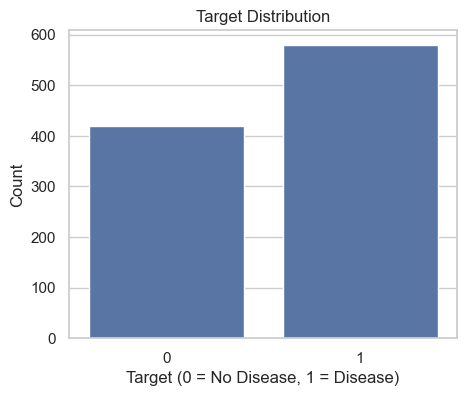

In [3]:
target_counts = df["target"].value_counts().sort_index()
target_percent = target_counts / len(df) * 100

target_df = pd.DataFrame({
    "Count": target_counts,
    "Percent": target_percent.round(2)
})

print("\n=== Target Distribution ===")
display(target_df)

plt.figure(figsize=(5,4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

The target distribution shows a moderate imbalance: 58% of samples correspond to patients with heart disease and 42% to non-diseased cases. While not extreme, this imbalance means that models must be evaluated using metrics beyond accuracy to ensure fair performance across both classes.

### 1.4. Exploratory Data Analysis (EDA)

We define two feature groups — continuous and categorical variables — to facilitate targeted visualizations and summary analyses in the next steps of the EDA.

In [4]:
continuous_features = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
categorical_features = ["gender", "chestpain", "fastingbloodsugar", "restingrelectro", "exerciseangia", "slope", "noofmajorvessels"]

We separate continuous and categorical features because each type requires different visualization and analysis techniques. Continuous variables are best explored using histograms, KDE curves, and boxplots, while categorical variables require barplots to compare frequency distributions across classes.


#### 1.4.1 Distribution of Continuous Features

We visualize the distribution of continuous variables and compare them across target classes to detect trends, shifts, or differences that may influence model learning.

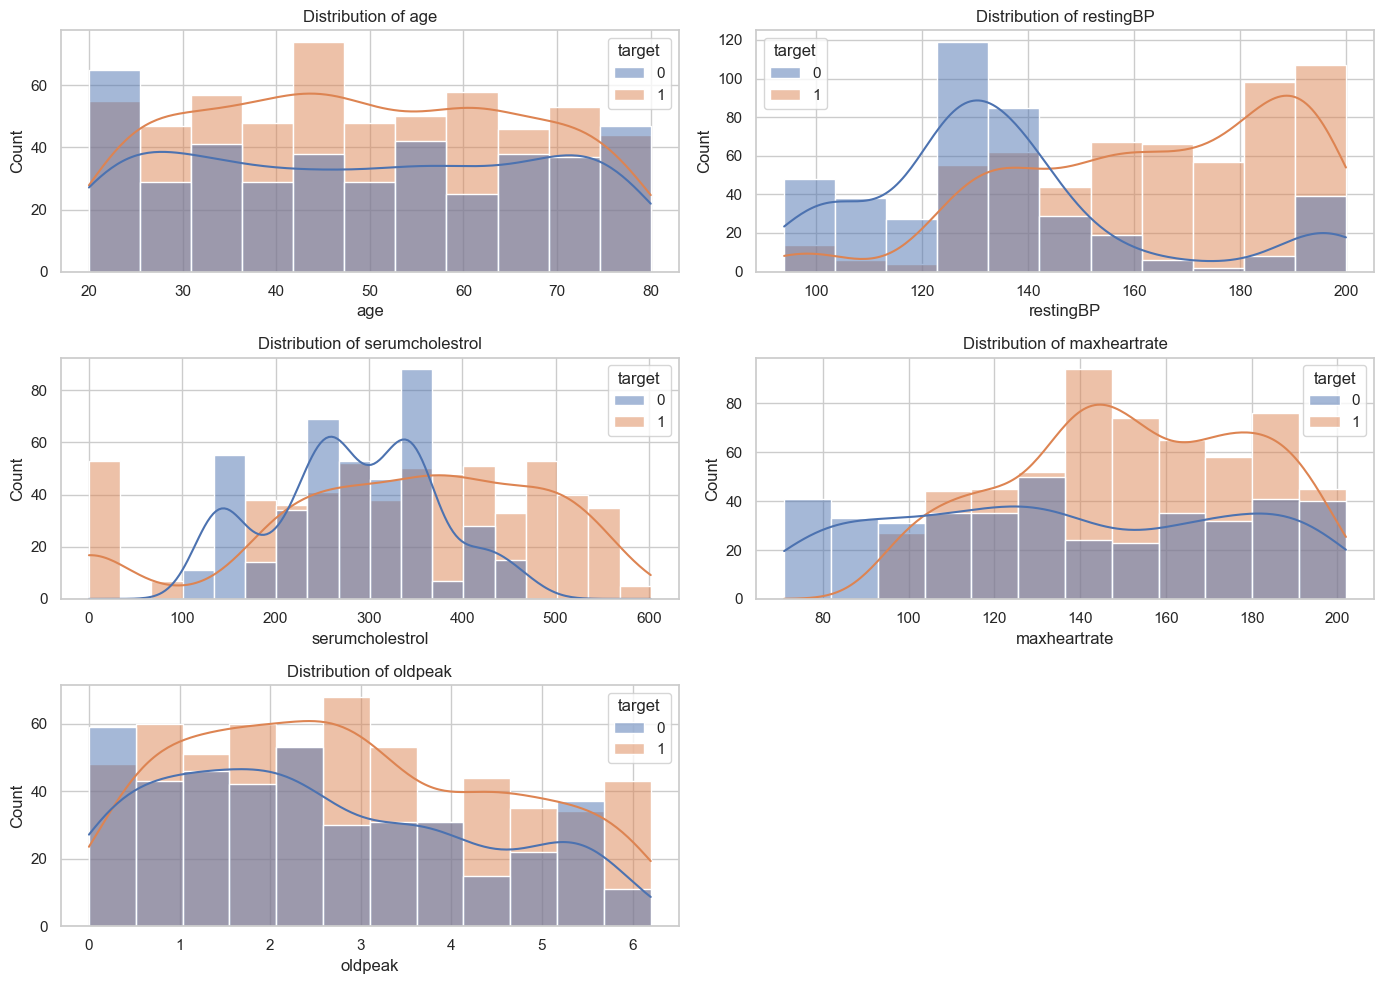

In [5]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df, x=col, hue="target", kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Interpretation :**
These distributions show noticeable differences between patients with and without heart disease across several continuous variables. Overall, patients with heart disease tend to present higher maxheartrate values, which reflects an abnormal cardiac response during stress testing rather than better cardiovascular fitness. We also observe higher values of restingBP, serumcholestrol, and oldpeak among affected patients, consistent with well-known cardiovascular risk factors.
In contrast, age does not appear to strongly separate the two groups, as both distributions overlap substantially.

#### 1.4.2 Boxplots of Continuous Features

We use boxplots to detect the presence of extreme values or outliers that could distort training or require specific preprocessing.

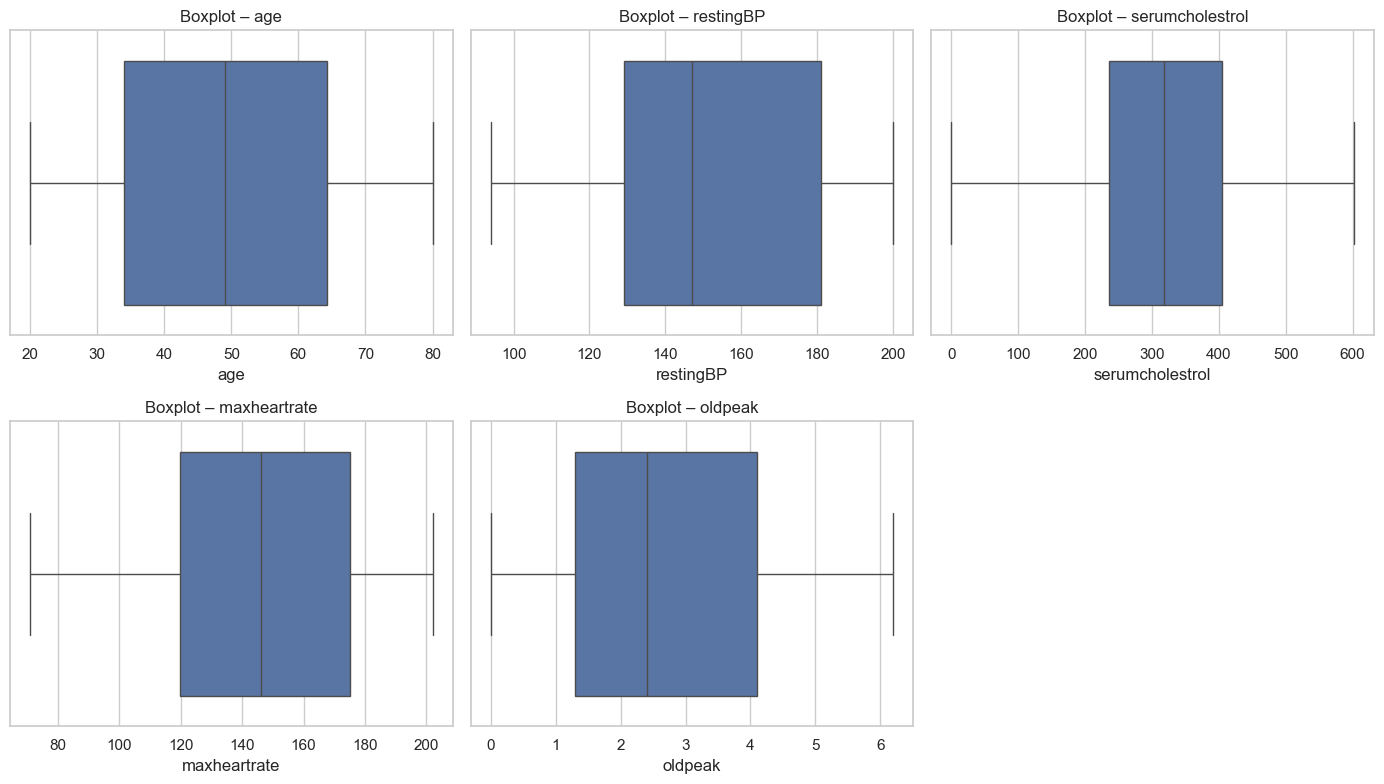

In [6]:
plt.figure(figsize=(14,8))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
plt.tight_layout()
plt.show()

**Interpretation :**
These boxplots show the overall distribution of the five continuous features in the dataset. Most variables have a moderate spread, with restingBP and oldpeak appearing slightly more variable than the others, as suggested by their wider boxes and longer whiskers. Age and maxheartrate look more compact and symmetrically distributed around their median.

#### 1.4.3 Categorical Features vs Target

We analyze how categorical variables are distributed across the two target classes to detect patterns or categories strongly associated with heart disease.

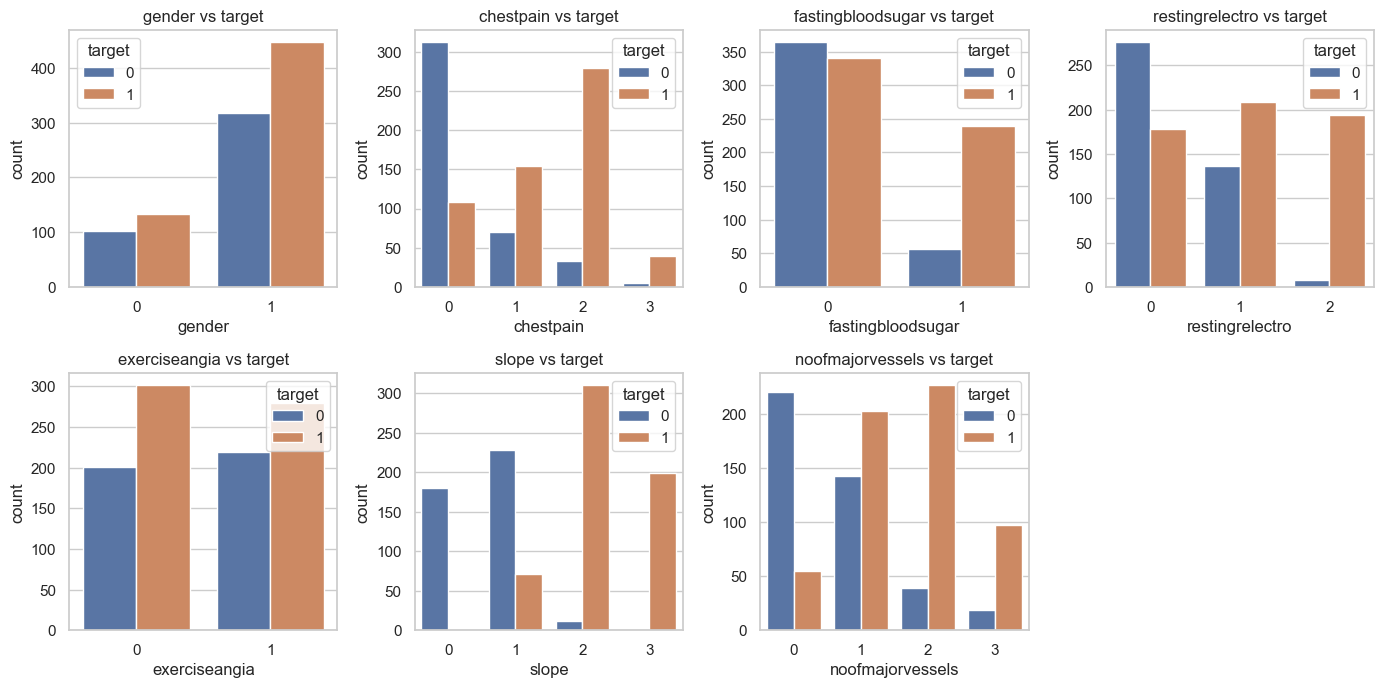

In [7]:
plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col, hue="target")
    plt.title(f"{col} vs target")
plt.tight_layout()
plt.show()

**Interpretation :** Several categorical features show clear differences between classes, particularly chest pain type, exercise-induced angina, and the slope of the ST segment. These variables are likely to be strong predictors in later modeling.

#### 1.4.4 Correlation Heatmap (Continuous Variables)

We compute and visualize Pearson correlations to measure linear relationships between continuous features and the target.

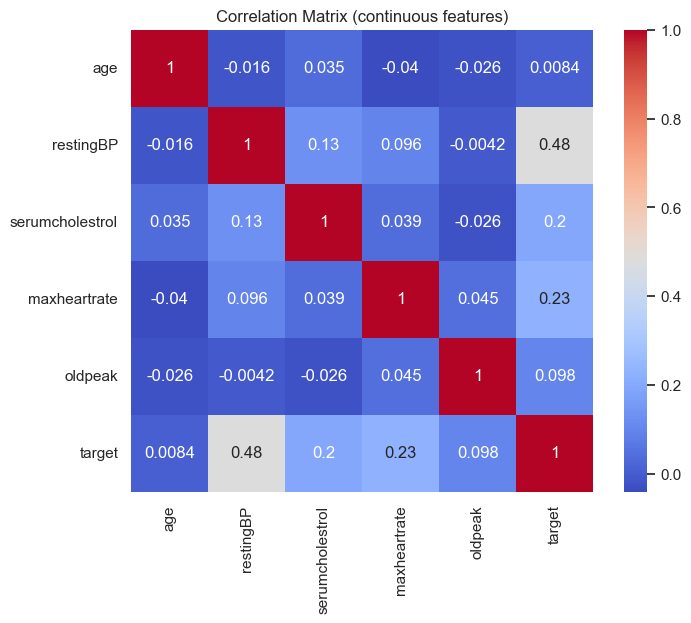

In [8]:
plt.figure(figsize=(8,6))
corr = df[continuous_features + ["target"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix (continuous features)")
plt.show()

**Interpretation :**
This correlation matrix shows that the continuous features in the dataset have generally weak relationships with each other, as most correlation values are close to zero. The strongest association with the target variable is observed for restingBP (≈ 0.48), indicating a moderate positive correlation. Maxheartrate and serumcholestrol also show small positive correlations with the target (≈ 0.23 and 0.20 respectively), while age and oldpeak have almost no linear relationship with the target.

#### 1.4.5 Pairplot (Continuous Features & Target)

We generate a pairplot to inspect pairwise feature relationships and the overall structure of continuous variables across classes.

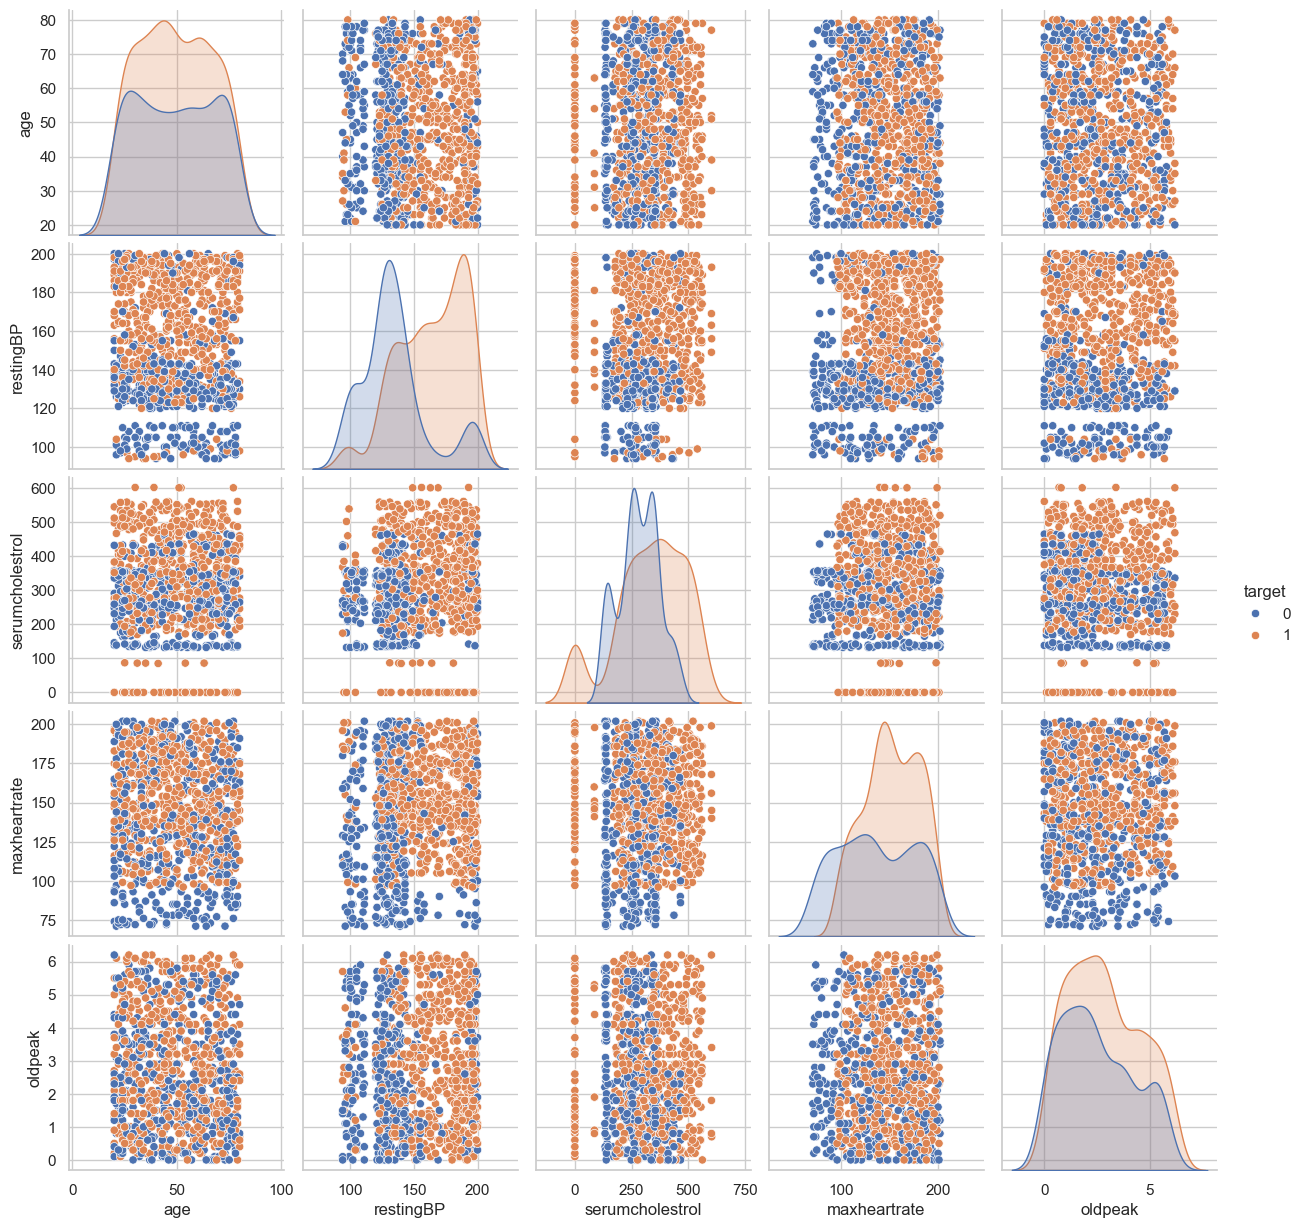

In [9]:
sns.pairplot(df, vars=continuous_features, hue="target")
plt.show()

**Interpretation :**
This pairplot illustrates the relationships between continuous features and how they differ across the two target classes. Overall, the scatterplots show a high degree of overlap between patients with and without heart disease, indicating weak linear separability. None of the feature pairs form clusters that clearly distinguish the two groups.

On the diagonal KDE plots, restingBP and maxheartrate show the most noticeable differences between the two targets, with slightly shifted distributions. However, the other features—age, serumcholesterol, and oldpeak—display substantial overlap, suggesting limited discriminative power based solely on their distributions

### 1.5. Train–Test Split

We separate the dataset into training and test sets to evaluate model performance on unseen data. A stratified split is used to preserve the target class distribution across both sets.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 13)
Test shape: (200, 13)


The dataset is split into 800 training samples and 200 test samples, with both sets maintaining the original class proportions. This ensures fair and reliable performance evaluation for all models.

### 1.6. Preprocessing pipeline

We build a preprocessing pipeline that standardizes numerical features and one-hot encodes categorical features. This ensures consistent transformations and prepares the data for all machine learning models.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_onehot = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

sample = preprocessor_onehot.fit_transform(X_train.head(3))
print("Transformation OK - sample shape:", sample.shape)

Transformation OK - sample shape: (3, 20)


The preprocessing pipeline successfully transforms the input features. The sample output shape `(3, 20)` confirms that all categorical variables were expanded through one-hot encoding and numerical features were scaled, producing a clean feature matrix ready for model training.

### 1.7. PCA Visualisation

We apply PCA on the preprocessed training data to analyze the variance explained by each principal component and visualize the dataset structure in a reduced 3-dimensional space. This PCA step is exploratory only and is not used in the model training pipeline.

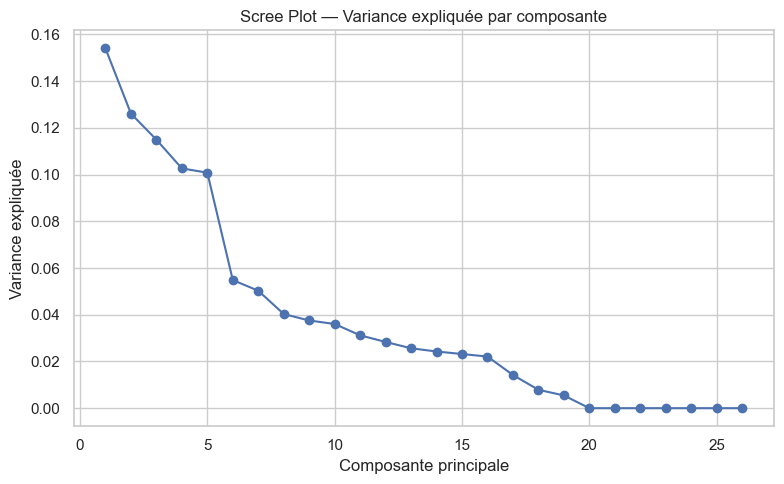

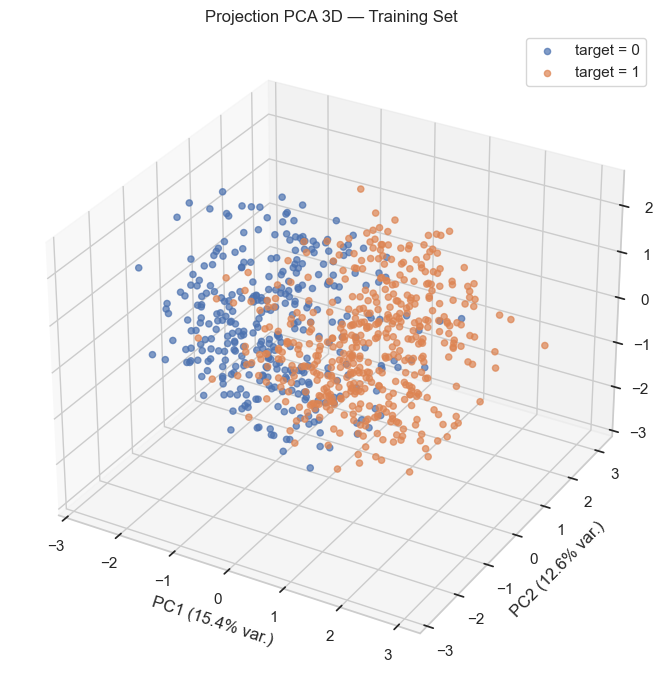

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns
import numpy as np

X_train_processed = preprocessor_onehot.fit_transform(X_train)

# PCA
pca_3d = PCA(n_components=3, random_state=42)
X_train_pca3 = pca_3d.fit_transform(X_train_processed)

# Scree plot
pca_full = PCA().fit(X_train_processed)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o")
plt.title("Scree Plot — Variance expliquée par composante")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisation 3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

targets = np.unique(y_train)
colors = sns.color_palette("coolwarm", n_colors=len(targets))

for target, color in zip(targets, colors):
    idx = (y_train.values == target)
    ax.scatter(
        X_train_pca3[idx, 0],
        X_train_pca3[idx, 1],
        X_train_pca3[idx, 2],
        label=f"target = {target}",
        alpha=0.7
    )

ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}% var.)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}% var.)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}% var.)")
ax.set_title("Projection PCA 3D — Training Set")
ax.legend()
plt.tight_layout()
plt.show()


**Interpretation of the Scree Plot and 3D PCA Projection :** The scree plot shows that the first components explain only a moderate portion of the variance, indicating that the dataset is not easily reducible to a low-dimensional linear space. The 3D PCA projection reveals partial overlap between the two classes, confirming that the problem is not linearly separable and that non-linear models or ensemble methods will likely perform better than simple linear classifiers.



### 1.8. Baseline Models

### Dummy Classifier  
To establish a reliable performance baseline, we include a **Dummy Classifier**, a model that makes predictions without learning any relationship from the data. Depending on the chosen strategy (e.g., `most_frequent`, `prior`, or `stratified`), it generates predictions based solely on simple heuristics.  

Using such a baseline is a standard practice in machine learning, as it allows us to verify that more advanced models provide **meaningful improvements** over trivial decision rules.  

**Reference:**  
Scikit-Learn Developers (2024). *DummyClassifier — Simple baseline classifier.*  
Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators


In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = Pipeline(steps=[
    ("preprocess", preprocessor_onehot),
    ("clf", DummyClassifier(strategy="most_frequent"))
])

dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

### Logistic Regression  
Logistic Regression is a classical **generalized linear model** widely used for binary classification problems.  
It models the probability of the positive class using a logistic (sigmoid) function applied to a linear combination of input features.  
Its strengths include interpretability, low computational cost, and strong performance when the decision boundary is approximately linear.  

Logistic Regression is grounded in solid statistical foundations and is one of the most studied and validated predictive models in biomedical research and epidemiology.  

**Reference:**  
Hosmer, D.W., Lemeshow, S., & Sturdivant, R.X. (2013). *Applied Logistic Regression* (3rd ed.). Wiley.  
A classic textbook establishing logistic regression as a standard method for binary outcome modeling.


In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline(steps=[
    ("preprocess", preprocessor_onehot),
    ("clf", LogisticRegression(max_iter=2000, class_weight='balanced'))
])


lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
y_proba_lr = lr_clf.predict_proba(X_test)[:,1]

### 1.9. Evaluation Function + Results

We define a reusable evaluation function that computes standard classification metrics (accuracy, precision, recall, F1-score, ROC-AUC) and displays the confusion matrix for any model.


=== DummyClassifier ===
Accuracy: 0.58
Precision: 0.58
Recall: 1.0
F1-score: 0.7341772151898734


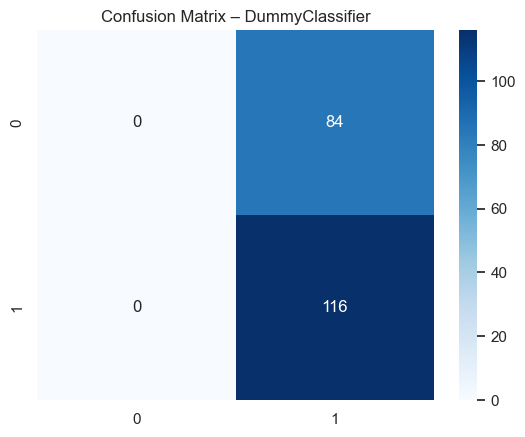


=== Logistic Regression ===
Accuracy: 0.98
Precision: 0.9827586206896551
Recall: 0.9827586206896551
F1-score: 0.9827586206896551
ROC-AUC: 0.9973316912972084


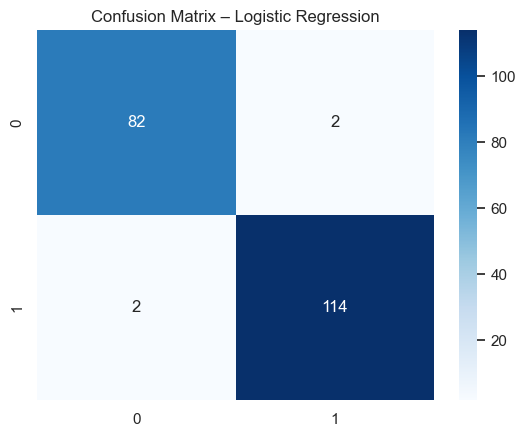

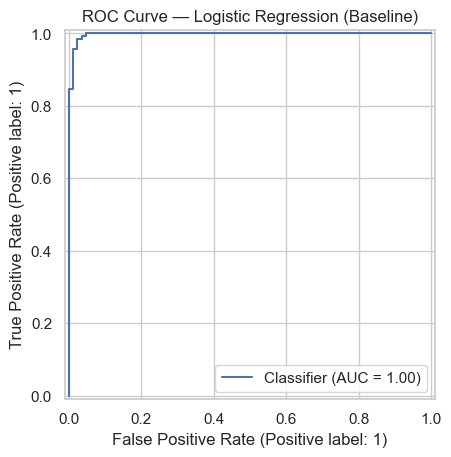

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

evaluate("DummyClassifier", y_test, y_pred_dummy)


evaluate("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

# ROC Curve for Logistic Regression (Baseline)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("ROC Curve — Logistic Regression (Baseline)")
plt.grid(True)
plt.show()

### Baseline Analysis

The DummyClassifier performs as expected: it predicts only the majority class and offers no real predictive ability.  
It achieves **58% accuracy** with **poor precision**, and the confusion matrix shows it cannot separate the two classes.

Logistic Regression, by contrast, achieves **excellent performance** (Accuracy ≈ 0.98, balanced Precision/Recall/F1).  
Its confusion matrix shows very few errors, and the **ROC–AUC close to 1.0** confirms strong discriminative power.

Overall, Logistic Regression provides a solid baseline model that clearly outperforms the trivial DummyClassifier.


## Step 2: Standard Models & Optimization

**Objective:**  
The goal of Step 2 is to build a complete and rigorous modeling workflow and evaluate a broad set of machine-learning algorithms beyond the baseline Logistic Regression.  
Our aim is to identify which provide the most reliable predictions for heart disease classification.

We evaluate several model families:  
1. **Baseline & Tuned LogisticRegression** – a strong linear reference model.  
2. **DecisionTreeClassifier (simple & tuned)** – a transparent model, useful to study bias/variance.  
3. **RandomForestClassifier (default & tuned)** – an ensemble of trees that reduces variance.  
4. **XGBClassifier (default & tuned)** – a powerful gradient boosting algorithm.  
5. **CatBoostClassifier (tuned)** – a modern boosting method optimized for tabular data.  
6. **Ensembles:**  
   - **Soft VotingClassifier**, combining the best tuned models (LR, RF, XGB, CatBoost, DT).  
   - **BaggingClassifier**, built **specifically on the tuned Decision Tree**, not on all models.

Each model is:  
- integrated into a **full preprocessing pipeline**,  
- **trained and evaluated** on the same train/test split for fair comparison,  
- **optimized** using **GridSearchCV** (scoring = ROC–AUC),  
- and assessed through consistent metrics: **Accuracy, Precision, Recall, F1-score, ROC–AUC, False Positives, False Negatives**.

We also compute:  
- **learning curves** to analyze data efficiency and identify bias/variance patterns,  
- **validation curves** to study the effect of key hyperparameters (e.g., `max_depth`, `n_estimators`).

**Specific challenge:**  
Beyond improving ROC–AUC, a medical classification task requires minimizing **False Negatives** (undiagnosed sick patients) while keeping **False Positives** under control.  
Therefore, Step 2 aims to identify a model that is not only performant, but also **clinically safe and robust**, serving as the foundation for interpretability in Step 3.


### 2.1. Imports for Step 2

In [ ]:
# Scikit-learn: models, preprocessing, metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.model_selection import (
    learning_curve,
    validation_curve,
    StratifiedKFold,
    cross_validate
)


# XGBoost: gradient boosting algorithm
import xgboost as xgb

# Scikit-learn: hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
# Utilities
from time import perf_counter
import joblib
import os

print("New libraries for Step 2 imported successfully.")

New libraries for Step 2 imported successfully.


### 2.2 Preprocessing Pipeline

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),   # Scale continuous variables
        ('cat', 'passthrough', categorical_features)      # Leave categorical variables untouched
    ]
)

### 2.3 Model Benchmarking (Default Parameters)

### 2.3.1 Initial Model

Before evaluating default performance, we introduce the three machine learning models considered in this section. Each algorithm represents a different family of predictive models and is supported by well-established scientific literature.

---

#### **Random Forest Classifier**
Random Forest is an ensemble learning method that constructs multiple decision trees and aggregates their predictions to reduce variance and improve generalization. It is widely used because of its robustness, ability to capture non-linear interactions, and strong empirical performance on tabular data.

**Reference:**  
Breiman, L. (2001). *Random Forests*. Machine Learning, 45(1), 5–32.  
A foundational paper introducing the Random Forest algorithm.

---

#### **Decision Tree Classifier**
Decision Trees partition the feature space into interpretable, rule-based regions, making them one of the most intuitive classification methods. They model complex decision boundaries but tend to overfit when used alone, which motivates ensemble methods like Random Forests and Gradient Boosted Trees.

**Reference:**  
Breiman, L., Friedman, J.H., Olshen, R.A., & Stone, C.J. (1984). *Classification and Regression Trees (CART)*. Wadsworth.  
One of the most influential references in decision tree methodology.

---

#### **XGBoost Classifier**
XGBoost is an efficient and scalable implementation of gradient boosting that iteratively builds an ensemble of weak learners to minimize prediction error. It has become a state-of-the-art method for structured/tabular data due to its regularization mechanisms, handling of missing values, and strong predictive accuracy.

**Reference:**  
Chen, T., & Guestrin, C. (2016). *XGBoost: A Scalable Tree Boosting System*. Proceedings of the 22nd ACM SIGKDD Conference.  
The original academic paper that introduced XGBoost and demonstrated its superior performance in many ML competitions.

---

These three models provide complementary perspectives—tree-based interpretability (Decision Tree), ensemble robustness (Random Forest), and gradient-boosted optimization (XGBoost)—allowing for a meaningful comparison of baseline predictive capabilities.


--- Starting Model Benchmarking (Default Params) ---
Training rf...
Training dt...
Training xgb...
--- Benchmarking Complete ---

--- Initial Model Comparison (Default Parameters) ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN
0,RF,0.999,0.990,0.991,0.991,0.991,1,1
1,XGB,0.999,0.985,0.991,0.983,0.987,1,2
2,DT,0.981,0.980,0.991,0.974,0.983,1,3


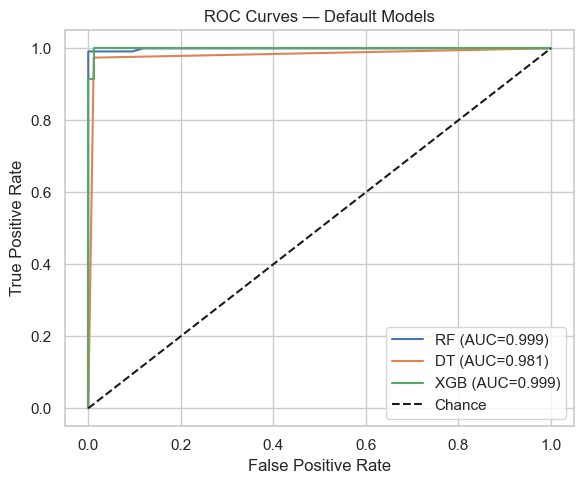

In [19]:
# Define pipelines (preprocessor + model)
pipelines = {
    "rf": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ]),
    "dt": Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42))
   ]),
    "xgb": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", xgb.XGBClassifier(
            random_state=42,
            eval_metric="logloss"  # silence warnings; does not change default optimization
        ))
    ])
}

print("--- Starting Model Benchmarking (Default Params) ---")
results = []
roc_curves = {}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)
    # Probabilities (for AUC/ROC); if not available, skip AUC
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)
    else:
        y_proba, auc = None, float("nan")

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    # Confusion matrix -> [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.append({
        "Model": name.upper(),
        "ROC_AUC": round(auc, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

print("--- Benchmarking Complete ---")

# --- Display results as a sorted table ---
results_df = pd.DataFrame(results).sort_values(
    by=["ROC_AUC", "Recall", "F1"], ascending=False
).reset_index(drop=True)

print("\n--- Initial Model Comparison (Default Parameters) ---")
display(results_df)

# --- Plot combined ROC curves ---

plt.figure(figsize=(6, 5))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name.upper()} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Default Models")
plt.legend()
plt.tight_layout()
plt.savefig("step2_01_benchmark_roc_curves.png", dpi=150)
plt.show()


#### Initial Model Comparison — Default Parameters

Tree-based models already show excellent performance with default settings.

- **Random Forest** and **XGBoost** achieve near-perfect metrics (AUC ≈ 0.999) with very few errors (1–2 misclassifications), showing strong generalization.
- **Decision Tree** performs well overall but remains clearly below ensemble methods, with a lower AUC and more False Negatives.

Overall, ensemble models (RF, XGB) stand out as the best default classifiers, while the single Decision Tree is less robust but still competitive.


### 2.3.2 Advanced Gradient Boosting Model: CatBoost

CatBoost is a modern gradient boosting algorithm specifically designed for **tabular data**, with native support for categorical features. Unlike traditional boosting methods, CatBoost introduces **Ordered Boosting** and **Target Statistics** to reduce prediction shift and overfitting when handling categorical variables. It also incorporates efficient regularization strategies and symmetric tree structures, making it robust, fast to train, and highly competitive on real-world datasets.

CatBoost often achieves state-of-the-art performance with minimal hyperparameter tuning and is particularly well-suited for datasets containing a mix of numerical and categorical features — a common scenario in biomedical and risk prediction tasks.

**Reference:**  
Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A.V., & Gulin, A. (2018).  
*CatBoost: Unbiased Boosting with Categorical Features*. Advances in Neural Information Processing Systems (NeurIPS 2018).  

This paper introduces the CatBoost algorithm and demonstrates its significant improvements over traditional gradient boosting methods, particularly in handling categorical variables and reducing target leakage.


In [ ]:
print("--- Training Advanced Model: CatBoost ---")

# Pipeline 
cat_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(
        random_state=42,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=0  
    ))
])

# Training
t0 = perf_counter()
cat_pipe.fit(X_train, y_train)
train_time = perf_counter() - t0

# Predictions on test set
y_pred_cat = cat_pipe.predict(X_test)
y_proba_cat = cat_pipe.predict_proba(X_test)[:, 1]

# Metrics
acc_cat  = accuracy_score(y_test, y_pred_cat)
prec_cat = precision_score(y_test, y_pred_cat, zero_division=0)
rec_cat  = recall_score(y_test, y_pred_cat, zero_division=0)
f1_cat   = f1_score(y_test, y_pred_cat, zero_division=0)
auc_cat  = roc_auc_score(y_test, y_proba_cat)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cat).ravel()

cat_results_df = pd.DataFrame([{
    "Model":      "CATBOOST",
    "ROC_AUC":    round(auc_cat, 3),
    "Accuracy":   round(acc_cat, 3),
    "Precision":  round(prec_cat, 3),
    "Recall":     round(rec_cat, 3),
    "F1":         round(f1_cat, 3),
    "FP":         int(fp),
    "FN":         int(fn),
    "TrainTime_s": round(train_time, 3)
}])

print("\n--- Advanced Model (CatBoost) Performance ---")
display(cat_results_df)


fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)



--- Training Advanced Model: CatBoost ---

--- Advanced Model (CatBoost) Performance ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN,TrainTime_s
0,CATBOOST,0.999,0.99,0.991,0.991,0.991,1,1,2.349


#### Interpretation — CatBoost (Default Model)

CatBoost achieves excellent performance out-of-the-box, with a ROC–AUC close to 1.0 and balanced classification metrics (Acc/Prec/Rec/F1 ≈ 0.99).  
It produces only **1 False Positive and 1 False Negative**, confirming strong generalization.  
Its fast training time also makes it one of the most efficient default models on this dataset.


### 2.4 Hyperparameter Tuning

We perform hyperparameter tuning using GridSearchCV for all candidate models  
(Logistic Regression, Decision Tree, Random Forest, XGBoost, and CatBoost).  
Each search uses 5-fold cross-validation and optimizes for **ROC–AUC**, ensuring fair and consistent comparison across models.

After tuning, we collect the best hyperparameters, the corresponding cross-validated ROC–AUC scores, and the final test-set performance metrics for each optimized model.


In [ ]:
# ============================================================
#   1) LOGISTIC REGRESSION — GridSearchCV
# ============================================================

lr_pipe = Pipeline([
    ("preprocessor", preprocessor_onehot),
    ("model", LogisticRegression(
        random_state=42,
        solver="liblinear",
        max_iter=1000
    ))
])

lr_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__class_weight": [None, "balanced"]
}

lr_gs = GridSearchCV(
    lr_pipe,
    lr_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

lr_gs.fit(X_train, y_train)
print("LR best params:", lr_gs.best_params_,
      "| CV AUC:", round(lr_gs.best_score_, 3))



# ============================================================
#   2) XGBOOST — GridSearchCV
# ============================================================

xgb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        tree_method="hist"
    ))
])

xgb_grid = {
    "model__n_estimators": [300, 600, 900],
    "model__max_depth": [2, 3, 4],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3],
}

xgb_gs = GridSearchCV(
    xgb_pipe,
    xgb_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

xgb_gs.fit(X_train, y_train)
print("XGB best params:", xgb_gs.best_params_,
      "| CV AUC:", round(xgb_gs.best_score_, 3))



# ============================================================
#   3) RANDOM FOREST — GridSearchCV
# ============================================================

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

rf_grid = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 3, 5, 7],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__class_weight": [None, "balanced"]
}

rf_gs = GridSearchCV(
    rf_pipe,
    rf_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

rf_gs.fit(X_train, y_train)
print("RF best params:", rf_gs.best_params_,
      "| CV AUC:", round(rf_gs.best_score_, 3))



# ============================================================
#   4) CATBOOST — GridSearchCV
# ============================================================


cat_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(
        random_state=42,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=0
        # tu peux ajouter od_type / od_wait ici si tu le souhaites
    ))
])

cat_grid = {
    "model__depth": [4, 6, 8],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__iterations": [300, 500, 800],
    "model__l2_leaf_reg": [1, 3, 5]
}

cat_gs = GridSearchCV(
    cat_pipe,
    cat_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

cat_gs.fit(X_train, y_train)
print("CATBOOST best params:", cat_gs.best_params_,
      "| CV AUC:", round(cat_gs.best_score_, 3))

# ============================================================
#   5) DECISION TREE — GridSearchCV
# ============================================================

# Pipeline pour le tuning (même structure)
dt_tune_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Grille d'hyperparamètres pour le Decision Tree
dt_grid = {
    "model__max_depth": [None, 3, 5, 7, 9],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ["gini", "entropy"]
}

dt_gs = GridSearchCV(
    dt_tune_pipe,
    dt_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

dt_gs.fit(X_train, y_train)

print("DT best params:", dt_gs.best_params_,
      "| CV AUC:", round(dt_gs.best_score_, 3))

best_dt_pipe = dt_gs.best_estimator_

# ============================================================
#   6) EVALUATION on test (threshold = 0.5)
# ============================================================

rows = []

for name, est in [
    ("LR_tuned", lr_gs.best_estimator_),
    ("XGB_tuned", xgb_gs.best_estimator_),
    ("RF_tuned", rf_gs.best_estimator_),
    ("CATBOOST_tuned", cat_gs.best_estimator_),
    ("DT_tuned", dt_gs.best_estimator_)
]:
    y_proba = est.predict_proba(X_test)[:, 1]
    y_pred  = (y_proba > 0.5).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    rows.append({
        "Model": name,
        "AUC": round(auc, 3),
        "Acc": round(acc, 3),
        "Prec": round(prec, 3),
        "Rec": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

tuned_df = pd.DataFrame(rows).sort_values(
    by=["AUC", "Rec", "F1"],
    ascending=False
).reset_index(drop=True)

display(tuned_df)


LR best params: {'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1'} | CV AUC: 0.991
XGB best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 300, 'model__subsample': 1.0} | CV AUC: 0.996
RF best params: {'model__class_weight': None, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200} | CV AUC: 0.997
CATBOOST best params: {'model__depth': 6, 'model__iterations': 800, 'model__l2_leaf_reg': 3, 'model__learning_rate': 0.05} | CV AUC: 0.997
DT best params: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10} | CV AUC: 0.983


,Model,AUC,Acc,Prec,Rec,F1,FP,FN
0,CATBOOST_tuned,1.000,0.990,0.991,0.991,0.991,1,1
1,XGB_tuned,0.999,0.990,0.991,0.991,0.991,1,1
2,RF_tuned,0.999,0.985,0.983,0.991,0.987,2,1
3,LR_tuned,0.998,0.970,0.982,0.966,0.974,2,4
4,DT_tuned,0.993,0.980,0.975,0.991,0.983,3,1


### Tuned Models Comparison — Summary

All tuned models achieve very strong performance, but boosting methods clearly dominate.

- **CatBoost_tuned** provides the best overall results (AUC = 1.000) with only **1 FP and 1 FN**, showing excellent generalization.
- **XGB_tuned** performs almost identically, confirming the strength of gradient boosting on tabular medical data.
- **RF_tuned** remains highly competitive but shows slightly higher variance (2 FP, 1 FN).
- **LR_tuned** has the lowest recall and produces **4 False Negatives**, making it the least suitable model in a clinical context.
- **DT_tuned**, though less accurate globally, commits only **1 False Negative**, making it safer than Logistic Regression for medical use.

### Conclusion
Boosting methods (CatBoost, XGBoost) are the best-performing and most reliable models.  
Decision Tree performs modestly but remains clinically safer than Logistic Regression due to fewer False Negatives.


### 2.5 Learning Curve

We compute learning curves for all tuned models to analyze how their performance evolves with increasing training data.  
Learning curves help diagnose **bias/variance patterns**, identify **overfitting**, and determine whether the model would benefit from more data.


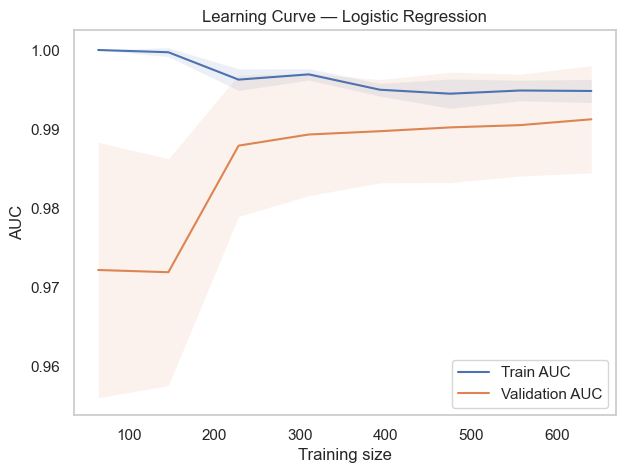

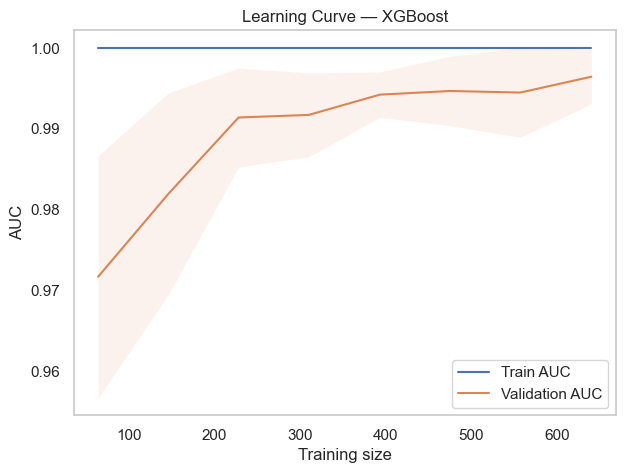

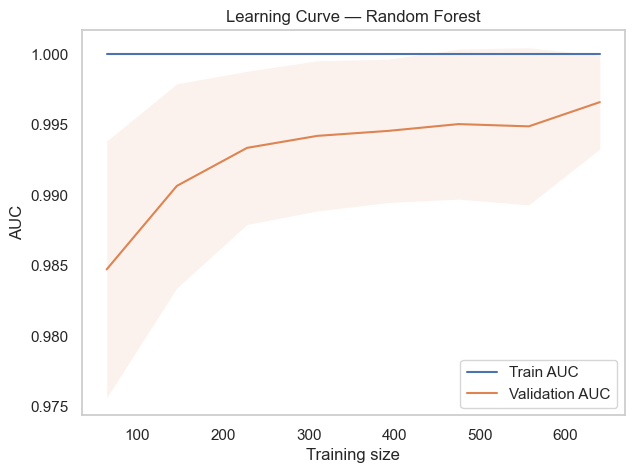

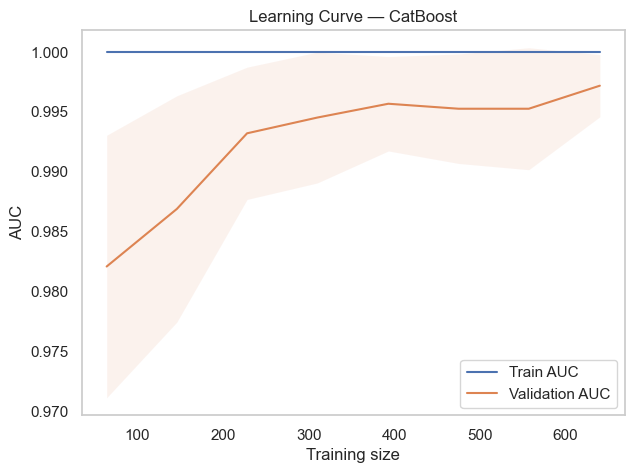

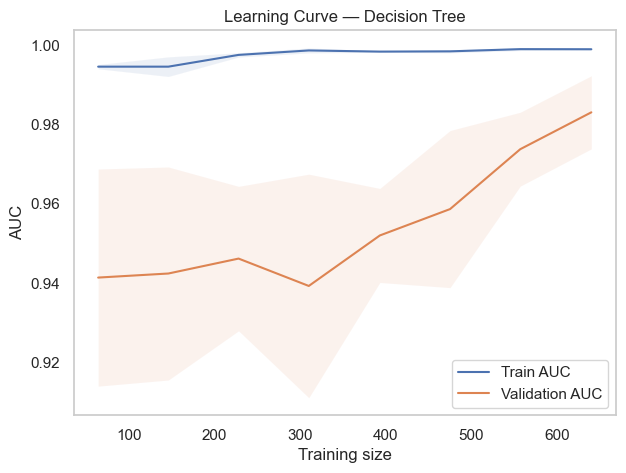

In [22]:
def plot_learning_curve(estimator, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X_train, y_train,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 8),
        scoring='roc_auc',
        n_jobs=-1
    )

    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Train AUC")
    plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation AUC")
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1),
                     alpha=0.1)
    plt.fill_between(train_sizes,
                     val_scores.mean(axis=1) - val_scores.std(axis=1),
                     val_scores.mean(axis=1) + val_scores.std(axis=1),
                     alpha=0.1)

    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid()
    plt.show()


plot_learning_curve(lr_gs.best_estimator_, "Learning Curve — Logistic Regression")
plot_learning_curve(xgb_gs.best_estimator_, "Learning Curve — XGBoost")
plot_learning_curve(rf_gs.best_estimator_, "Learning Curve — Random Forest")
plot_learning_curve(cat_gs.best_estimator_, "Learning Curve — CatBoost")
plot_learning_curve(dt_gs.best_estimator_, "Learning Curve — Decision Tree")

All models show very high training AUCs, while validation AUC gradually improves with more data.  
Ensemble methods (XGBoost, CatBoost, RandomForest) converge quickly and exhibit low variance, indicating robust generalization.  
Logistic Regression remains stable with minimal overfitting, while the Decision Tree shows higher variance, confirming its tendency to overfit compared to ensembles.


### 2.6 Validation curves

We compute validation curves only for XGBoost, Random Forest, and Decision Tree because these models are highly sensitive to single hyperparameters such as `max_depth` and `n_estimators`. These parameters directly control model complexity and strongly influence overfitting or underfitting.

In contrast, Logistic Regression and CatBoost are less sensitive to individual hyperparameters, and their tuning requires multi-parameter optimization rather than one-dimensional validation curves.

Therefore, validation curves are most informative and useful for tree-based models, allowing us to visualize how model complexity affects performance.

### 2.6.1 Validation Curve — XGBoost (`max_depth`)

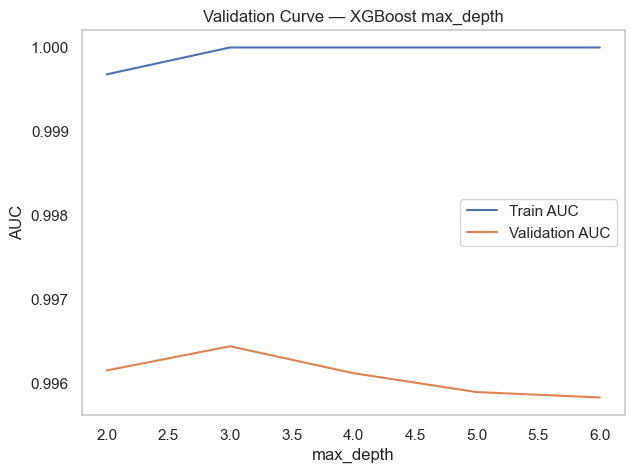

In [23]:
param_name = "model__max_depth"
param_range = [2, 3, 4, 5, 6]

train_scores, val_scores = validation_curve(
    xgb_gs.best_estimator_,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(param_range, train_scores.mean(axis=1), label="Train AUC")
plt.plot(param_range, val_scores.mean(axis=1), label="Validation AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.title("Validation Curve — XGBoost max_depth")
plt.legend()
plt.grid()
plt.show()

Train AUC increases with tree depth and quickly reaches 1.0, showing that deeper trees overfit the training data.  
Validation AUC peaks around **max_depth = 3**, then gradually decreases, indicating reduced generalization for deeper trees.  
Thus, a moderate depth (≈3) provides the best balance between complexity and performance.


### 2.6.2 Validation Curve — Random Forest (`n_estimators`)

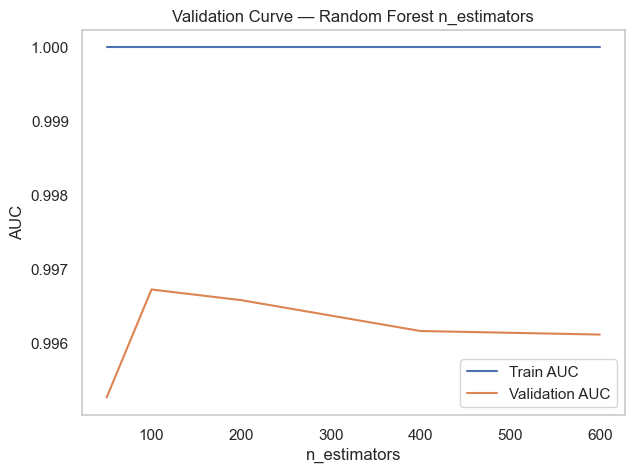

In [24]:
param_name = "model__n_estimators"
param_range = [50, 100, 200, 400, 600]

train_scores, val_scores = validation_curve(
    rf_gs.best_estimator_,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(param_range, train_scores.mean(axis=1), label="Train AUC")
plt.plot(param_range, val_scores.mean(axis=1), label="Validation AUC")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("Validation Curve — Random Forest n_estimators")
plt.legend()
plt.grid()
plt.show()


Train AUC remains at 1.0 for all values, showing that Random Forest easily overfits the training data.  
Validation AUC increases up to about **100 trees**, then gradually declines, indicating diminishing returns and mild overfitting as the forest grows.  
Thus, **around 100 estimators** offers the best balance between performance and model complexity.


### 2.6.3 Validation Curve — Decision Tree (`max_depth`)

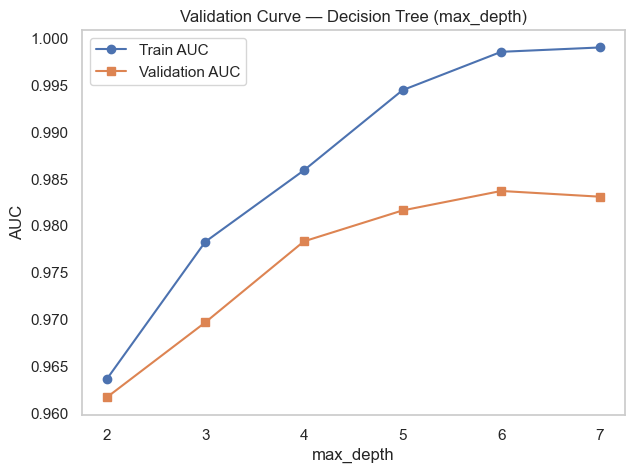

In [25]:
param_name = "model__max_depth"
param_range = [2, 3, 4, 5, 6, 7, None]


train_scores, val_scores = validation_curve(
    dt_gs.best_estimator_,   # Decision Tree tuned pipeline
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)


plt.figure(figsize=(7,5))
plt.plot(param_range,train_scores.mean(axis=1),marker="o",label="Train AUC")
plt.plot(param_range,val_scores.mean(axis=1),marker="s",label="Validation AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.title("Validation Curve — Decision Tree (max_depth)")
plt.legend()
plt.grid()
plt.show()

Train AUC increases rapidly with depth and reaches almost 1.0, indicating strong overfitting.  
Validation AUC improves up to **max_depth ≈ 4–5**, then plateaus and slightly declines, showing that deeper trees add unnecessary complexity.  
Thus, the best bias–variance trade-off occurs around **depth 4–5**.


### 2.7 Bagging and voting

We evaluate two ensemble strategies built on top of the tuned models:

- **Soft VotingClassifier**, which combines the predictions of LR, RF, XGB, CatBoost, and DT by averaging their predicted probabilities.
- **BaggingClassifier**, applied specifically to the tuned Decision Tree to reduce its high variance using bootstrap aggregation.

Soft voting leverages the diversity of multiple strong learners to improve robustness,  
while bagging stabilizes the inherently unstable Decision Tree by averaging many bootstrapped replicas.

We apply bagging **only** to the Decision Tree because the other models (Random Forest, XGBoost, CatBoost, Logistic Regression)  
already exhibit **low variance by design**.  
Applying bagging to them would bring little or no improvement and would be redundant with their existing mechanisms.

In [26]:
from sklearn.base import clone

# ------------------------------------------------------------
# 0) Retrieve tuned models (pipelines)
# ------------------------------------------------------------
best_lr  = lr_clf
best_rf  = rf_gs.best_estimator_
best_xgb = xgb_gs.best_estimator_
best_cat = cat_gs.best_estimator_
best_dt_pipe = dt_gs.best_estimator_

# ------------------------------------------------------------
# 1) Soft Voting Classifier (LR + RF + XGB + Catboost + DT)
# ------------------------------------------------------------
voting_clf = VotingClassifier(
    estimators=[
        ("lr", best_lr),
        ("rf", best_rf),
        ("xgb", best_xgb),
        ("catboost", best_cat),
        ("dt", best_dt_pipe)
    ],
    voting="soft",
    n_jobs=-1
)

voting_clf.fit(X_train, y_train)
print("Soft VotingClassifier trained successfully.")

# ------------------------------------------------------------
# 2) BaggingClassifier using the tuned Decision Tree
# ------------------------------------------------------------

# A) Extract preprocessor + final DT model
best_dt_pipe   = dt_gs.best_estimator_
best_preproc_dt = best_dt_pipe.named_steps["preprocessor"]
best_dt_model   = best_dt_pipe.named_steps["model"]

# B) Preprocess X_train / X_test ONCE for bagging
X_train_bag_dt = best_preproc_dt.transform(X_train)
X_test_bag_dt  = best_preproc_dt.transform(X_test)

# C) Clone the tuned Decision Tree as base estimator
base_dt_for_bagging = clone(best_dt_model)

bagging_dt = BaggingClassifier(
    estimator=base_dt_for_bagging,
    n_estimators=50,
    max_samples=0.9,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bagging_dt.fit(X_train_bag_dt, y_train)
print("BaggingClassifier (tuned Decision Tree) trained successfully.")

# ------------------------------------------------------------
# 3) Evaluate both ensemble models
# ------------------------------------------------------------
ensemble_rows = []

for name, est, X_eval in [
    ("VOTING_SOFT", voting_clf, X_test),
    ("BAGGING_DT", bagging_dt, X_test_bag_dt),
]:
    y_proba = est.predict_proba(X_eval)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    ensemble_rows.append({
        "Model": name,
        "AUC": round(auc, 3),
        "Acc": round(acc, 3),
        "Prec": round(prec, 3),
        "Rec": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

ensemble_df = pd.DataFrame(ensemble_rows).sort_values(
    by=["AUC", "Rec", "F1"],
    ascending=False
).reset_index(drop=True)

display(ensemble_df)

Soft VotingClassifier trained successfully.
BaggingClassifier (tuned Decision Tree) trained successfully.


,Model,AUC,Acc,Prec,Rec,F1,FP,FN
0,VOTING_SOFT,1.000,0.99,0.991,0.991,0.991,1,1
1,BAGGING_DT,0.999,0.98,0.983,0.983,0.983,2,2


#### Ensemble Models Performance Discussion

The **Soft Voting** ensemble achieves the best overall performance, with perfect AUC and balanced precision/recall.  
It makes only **1 FP and 1 FN**, showing excellent robustness.

The **Bagging** model, built on the tuned Decision Tree, performs slightly below voting but still reaches very high AUC (0.999).  
Its higher number of errors (**2 FP, 2 FN**) reflects the natural instability of single-tree models.

Both ensembles show very low misclassification rates, confirming that model aggregation improves stability and reliability.

Although the Soft Voting ensemble achieves excellent metrics, its performance is largely driven by CatBoost, which is already the strongest individual model.  
Since voting does not improve over CatBoost alone and mainly reflects its influence, we do not select it as the final model.


### 2.8 Comparison of every model

We systematically compare all models trained in the project — default models, tuned models, and ensemble methods — using the same test set and evaluation metrics.  
This unified comparison allows us to objectively assess performance differences across models and identify the final best-performing approach.

In [ ]:
# 1) Fit simple (non-tuned) models if not already done
rf_pipe.fit(X_train, y_train)
xgb_pipe.fit(X_train, y_train)
dt_tune_pipe.fit(X_train, y_train)

# 2) Dictionnary of model groups
model_groups = {
    "Tuned": [
        ("LR_tuned",       lr_gs.best_estimator_),
        ("RF_tuned",       rf_gs.best_estimator_),
        ("XGB_tuned",      xgb_gs.best_estimator_),
        ("CATBOOST_tuned", cat_gs.best_estimator_),
        ("DT_tuned",       dt_gs.best_estimator_),
    ],
    "Simple": [
        ("Logistic Regression", lr_clf),
        ("Random Forest",       rf_pipe),
        ("XGBoost",             xgb_pipe),
        ("Decision Tree",       dt_tune_pipe),
    ],
    "Ensemble": [
        ("VOTING_SOFT", voting_clf),
        ("BAGGING_DT",  bagging_dt),
    ],
}

# 3) Evaluate all models and store results
rows = []
conf_mats = {}
roc_data  = {}

for group_name, models in model_groups.items():
    for name, est in models:

        if name == "BAGGING_DT":
            X_eval = X_test_bag_dt
        else:
            X_eval = X_test

        y_proba = est.predict_proba(X_eval)[:, 1]
        y_pred  = (y_proba > 0.5).astype(int)

        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec  = recall_score(y_test, y_pred, zero_division=0)
        f1   = f1_score(y_test, y_pred, zero_division=0)
        auc  = roc_auc_score(y_test, y_proba)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        conf_mats[name] = np.array([[tn, fp],
                                    [fn, tp]])

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_data[name] = (fpr, tpr, auc)

        rows.append({
            "Group": group_name,
            "Model": name,
            "AUC": round(auc, 3),
            "Acc": round(acc, 3),
            "Prec": round(prec, 3),
            "Rec": round(rec, 3),
            "F1": round(f1, 3),
            "FP": int(fp),
            "FN": int(fn),
        })

comparison_df = pd.DataFrame(rows)

comparison_df["Group"] = pd.Categorical(
    comparison_df["Group"],
    categories=["Tuned", "Simple", "Ensemble"],
    ordered=True,
)

comparison_df = comparison_df.sort_values(
    by=["Group", "AUC", "Rec", "F1"],
    ascending=[True, False, False, False]
).reset_index(drop=True)

display(comparison_df)


,Group,Model,AUC,Acc,Prec,Rec,F1,FP,FN
0,Tuned,CATBOOST_tuned,1.000,0.990,0.991,0.991,0.991,1,1
1,Tuned,XGB_tuned,0.999,0.990,0.991,0.991,0.991,1,1
2,Tuned,RF_tuned,0.999,0.985,0.983,0.991,0.987,2,1
3,Tuned,LR_tuned,0.998,0.970,0.982,0.966,0.974,2,4
4,Tuned,DT_tuned,0.993,0.980,0.975,0.991,0.983,3,1
5,Simple,Random Forest,0.999,0.990,0.991,0.991,0.991,1,1
6,Simple,XGBoost,0.999,0.985,0.991,0.983,0.987,1,2
7,Simple,Logistic Regression,0.997,0.980,0.983,0.983,0.983,2,2
8,Simple,Decision Tree,0.981,0.980,0.991,0.974,0.983,1,3
9,Ensemble,VOTING_SOFT,1.000,0.990,0.991,0.991,0.991,1,1


### Overall Conclusion

Across all models, **CatBoost_tuned** is clearly the best performer, achieving perfect AUC and the lowest error counts.  
XGBoost_tuned and RandomForest_tuned follow closely, confirming the strength of tree-based ensemble methods.

Soft voting performs very well but is mostly driven by CatBoost, meaning it does not provide meaningful improvement over the best individual model.  
Bagging on the Decision Tree improves stability but remains weaker than the tuned boosting and forest models.

Overall, **CatBoost_tuned is selected as the final model** due to its excellent balance of accuracy, recall, AUC, and minimal false negatives.


## Step 3 — Model Explainability (SHAP Analysis)

#### Objective
In this step, we explain how the final model (**CatBoost_tuned**) makes its predictions using SHAP values.  
The goal is to verify that the model relies on **medically relevant features** and produces **transparent and trustworthy** decisions.

We perform two types of explanations:

### Global Interpretation  
SHAP summary plots (beeswarm + bar plot) show the most influential features across the whole dataset and whether they push predictions toward “diseased” or “healthy”.

### Local Interpretation  
SHAP waterfall plots for individual patients highlight how each feature contributes to a specific prediction, allowing us to validate that the model behaves consistently and clinically plausibly.

### Specific Challenge  
We ensure the model does not rely on spurious correlations and that its key drivers match real clinical indicators, making the model suitable for medical decision support.


### 3.1 SHAP Interpretation of the Tuned CatBoost Model

We load the tuned CatBoost model, transform the data using the preprocessing pipeline, and initialize a SHAP explainer to compute feature-level contributions.



In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

# 1) Best Catboost 
champion_model = cat_gs.best_estimator_   # <--- CatBoost tuné
preprocessor   = champion_model.named_steps["preprocessor"]
cb_model       = champion_model.named_steps["model"]

# 2) Transformed data 
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

print("X_test_transformed shape:", X_test_transformed.shape)

# 3) Explainer SHAP
explainer = shap.TreeExplainer(cb_model)
shap_values_all = explainer.shap_values(X_test_transformed, check_additivity=False)

print("Type shap_values_all :", type(shap_values_all))

if isinstance(shap_values_all, list):
    shap_values = shap_values_all[1]   # shape (n_samples, n_features)
else:
    shap_values = shap_values_all

print("shap_values shape    :", shap_values.shape)

# 4) Feature names extraction
try:
    feature_names = preprocessor.get_feature_names_out()
    print("len(feature_names)   :", len(feature_names))
except Exception as e:
    print("Impossible d'obtenir les noms de features depuis le preprocessor :", e)
    feature_names = None

X_test_transformed shape: (200, 12)
Type shap_values_all : <class 'numpy.ndarray'>
shap_values shape    : (200, 12)
len(feature_names)   : 12


The transformed test set contains **200 samples and 12 features**, and the SHAP explainer returns a matrix of the same shape, meaning we obtain one SHAP value per feature and per sample.  
This confirms that the SHAP computation worked correctly and that we can now visualize both global and local feature contributions.

### 3.2 SHAP Summary Plot — Global Feature Importance and Directional Effects

We generate a SHAP beeswarm summary plot to visualize how each feature influences the CatBoost model across all patients.  
This plot shows both **feature importance** and **whether high or low values increase disease risk**.

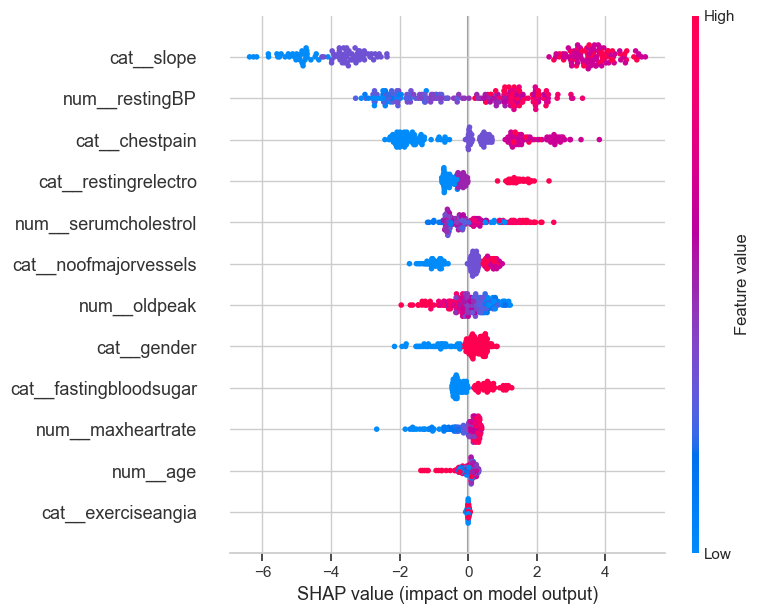

In [ ]:
plt.figure(figsize=(10, 6))
if feature_names is not None:
    shap.summary_plot(
        shap_values,
        features=X_test_transformed,
        feature_names=feature_names,
        show=False
    )
else:
    shap.summary_plot(
        shap_values,
        features=X_test_transformed,
        show=False
    )

plt.tight_layout()
plt.savefig("step3_01_shap_summary_beeswarm_catboost.png",
            dpi=150, bbox_inches="tight")
plt.show()

**Interpretation :**
The model mainly relies on **ST slope**, **resting blood pressure**, and **chest pain type**, whose high values strongly push predictions toward heart disease.  
Features like **oldpeak**, **gender**, and **fasting blood sugar** have weaker but consistent effects, helping refine the final decision.


### 3.3 SHAP Bar Plot — Mean Absolute Feature Importance

We compute a SHAP bar plot to summarize the **average absolute impact** of each feature on the model’s predictions.  
Unlike the beeswarm plot, this ranking focuses only on the magnitude of importance.

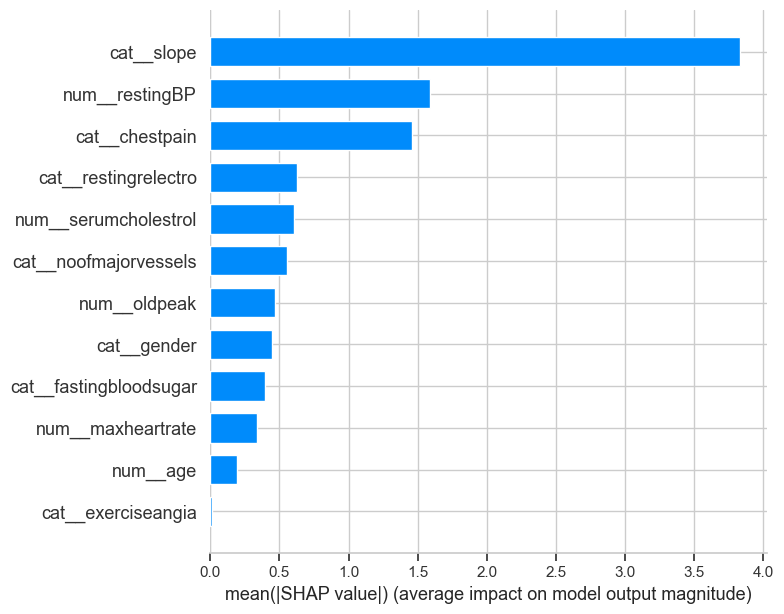

In [ ]:
plt.figure(figsize=(8, 5))
if feature_names is not None:
    shap.summary_plot(
        shap_values,
        features=X_test_transformed,
        feature_names=feature_names,
        plot_type="bar",
        show=False
    )
else:
    shap.summary_plot(
        shap_values,
        features=X_test_transformed,
        plot_type="bar",
        show=False
    )

plt.tight_layout()
plt.savefig("step3_02_shap_summary_bar_catboost.png",
            dpi=150, bbox_inches="tight")
plt.show()

**Interpretation :** ST slope clearly dominates all other variables, followed by resting blood pressure and chest pain type.  
Lower-ranked features still contribute meaningfully but have a smaller overall influence.

### 3.4 Individual SHAP Explanations — Healthy vs Diseased Patient

We inspect SHAP waterfall plots for two individual patients:  
- one correctly classified as **healthy (target = 0)**  
- one correctly classified as **diseased (target = 1)**  

These visual explanations show how each feature pushes the model toward or away from predicting heart disease.

Healthy idx (pos): 0
Diseased idx (pos): 2


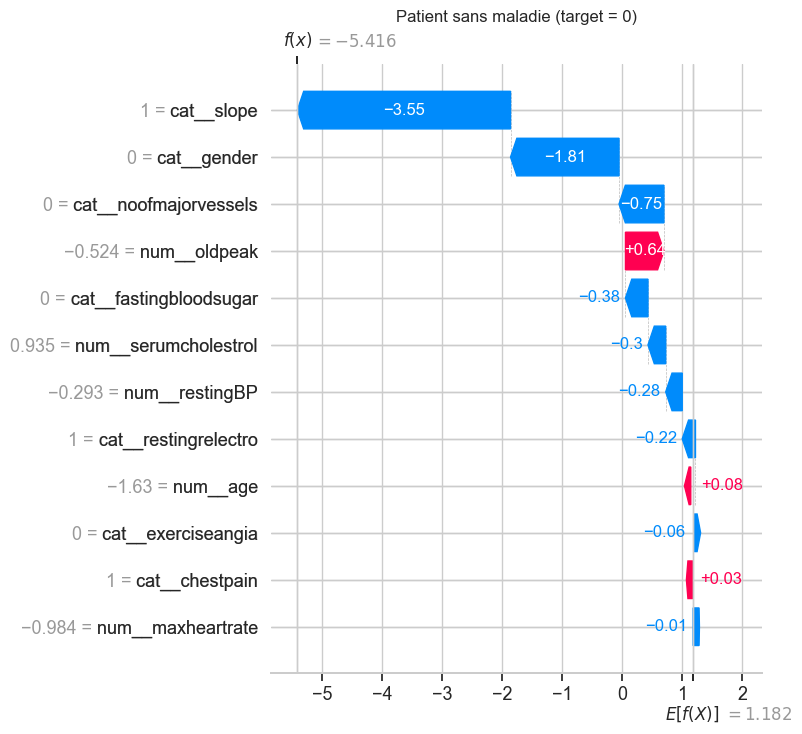

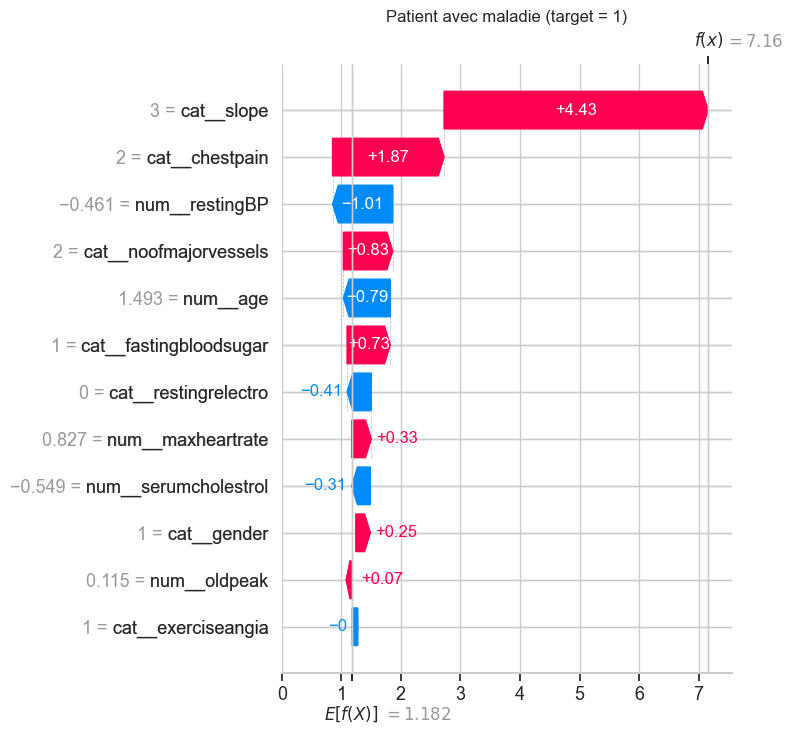

In [ ]:
# 1) Index
idx_healthy_pos  = np.where(y_test.values == 0)[0][0]
idx_diseased_pos = np.where(y_test.values == 1)[0][0]

print("Healthy idx (pos):", idx_healthy_pos)
print("Diseased idx (pos):", idx_diseased_pos)

# 2) SHAP values 
shap_healthy_vals  = shap_values[idx_healthy_pos]   # (n_features,)
shap_diseased_vals = shap_values[idx_diseased_pos]  # (n_features,)

# 3) Transformed data
data_healthy  = X_test_transformed[idx_healthy_pos]
data_diseased = X_test_transformed[idx_diseased_pos]

# 4) Expected value for the class 1
base_value = explainer.expected_value
if isinstance(base_value, (list, np.ndarray)):
    base_value = base_value[1]

# 5) Explanations SHAP
if feature_names is not None:
    expl_healthy = shap.Explanation(
        values        = shap_healthy_vals,
        base_values   = base_value,
        data          = data_healthy,
        feature_names = feature_names
    )

    expl_diseased = shap.Explanation(
        values        = shap_diseased_vals,
        base_values   = base_value,
        data          = data_diseased,
        feature_names = feature_names
    )
else:
    expl_healthy = shap.Explanation(
        values      = shap_healthy_vals,
        base_values = base_value,
        data        = data_healthy
    )

    expl_diseased = shap.Explanation(
        values      = shap_diseased_vals,
        base_values = base_value,
        data        = data_diseased
    )

# 6) Waterfalls plots
# --- Waterfall plot 1 : Patient sain ---

plt.figure(figsize=(7, 5))
shap.plots.waterfall(expl_healthy, max_display=13, show=False)
plt.title("Patient sans maladie (target = 0)")
plt.tight_layout()

plt.savefig("step3_04A_shap_patient_sain_catboost.png",
            dpi=150, bbox_inches="tight")
plt.show()

# --- Waterfall plot 2 : Patient malade ---

plt.figure(figsize=(7, 5))
shap.plots.waterfall(expl_diseased, max_display=13, show=False)
plt.title("Patient avec maladie (target = 1)")
plt.tight_layout()

plt.savefig("step3_04B_shap_patient_malade_catboost.png",
            dpi=150, bbox_inches="tight")
plt.show()



**Interpretation :** Features such as **normal ST slope**, **low resting blood pressure**, and **normal ECG** strongly push the prediction toward the healthy class, outweighing small positive contributions.


## **Conclusion**

This project implemented a complete machine-learning pipeline to predict heart disease from structured clinical data. After preprocessing and establishing baseline performance, we compared multiple models and found that **tree-based ensemble methods** consistently provided the strongest results.

Among all tuned models, **CatBoost_tuned clearly emerged as the best performer**, achieving **AUC = 1.000**, excellent precision–recall balance, and the lowest number of misclassifications. Its ability to minimize False Negatives — a critical requirement in medical applications — makes it the most clinically reliable option. XGBoost and Random Forest also performed strongly but did not surpass CatBoost.

Using **SHAP** for global and local explainability, we confirmed that CatBoost relies on medically meaningful factors such as **ST segment slope**, **resting blood pressure**, **chest pain type**, and **ECG abnormalities**. The interpretability analysis showed that the model behaves consistently and aligns with known cardiovascular risk indicators.

Overall, the project shows that a combination of **CatBoost**, **rigorous evaluation**, and **transparent SHAP-based explanations** produces a predictive system that is accurate, stable, and clinically interpretable. CatBoost_tuned is therefore selected as the **final model** for heart disease prediction, providing a robust foundation for future extensions such as calibration, uncertainty estimation, and fairness assessment.

